In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

all_tweets = pd.read_csv("/Users/cbaker4/tweet_jsons/get_ids/full_tweets/full_csv/final_dataset_unique.csv")


In [164]:
from datetime import datetime
import re

# Lambda functions for formatting the time fields
remove_ms = lambda x:re.sub("\+\d+\s","",x)
mk_dt = lambda x:datetime.strptime(remove_ms(x), "%a %b %d %H:%M:%S %Y")

# Start by converting the tweet time and user creation time to time delta
for col in all_tweets.loc[:,['tweet_created_at','user_creation_date']].columns:
    all_tweets[col] = all_tweets[col].apply(lambda x:mk_dt(x))


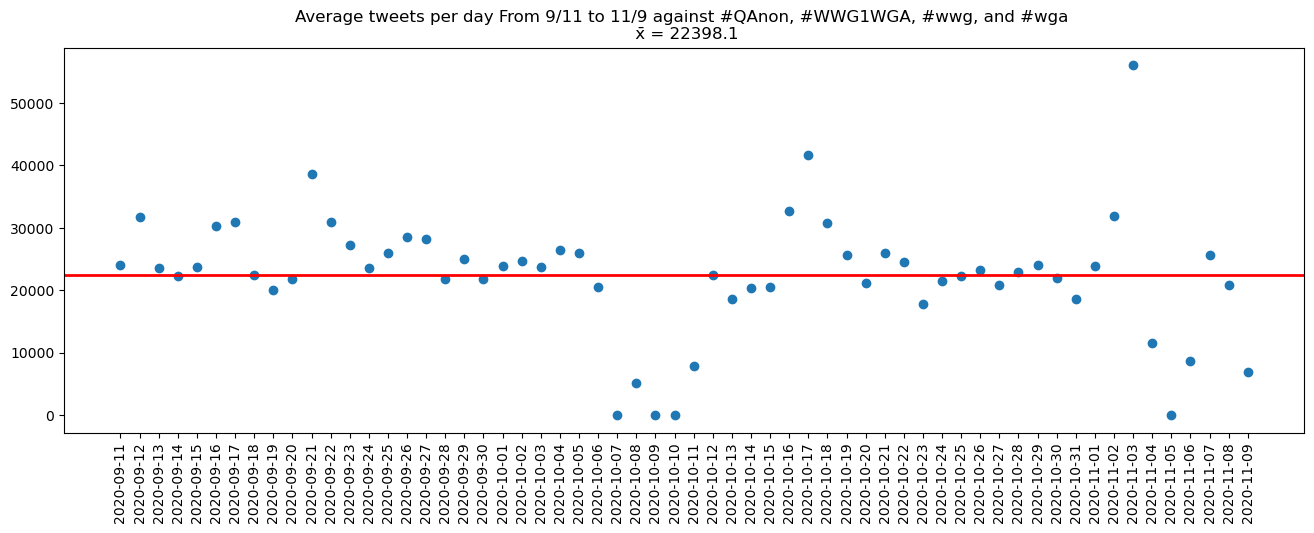

In [165]:

# Group the tweets by creation day, multiplying by 3 to approximate total tweet count
tweet_by_date = all_tweets.resample('D', on = 'tweet_created_at').size()
tweet_by_date = tweet_by_date.apply(lambda x: x*3)
tweet_by_date[0:6]

avg = tweet_by_date.mean()
med = tweet_by_date.median()
plt.rcParams['figure.figsize'] = [16, 5]
plt.scatter(tweet_by_date.index, tweet_by_date)
plt.axhline(linewidth=2, color='r', y=tweet_by_date.mean())
#plt.text(0,tweet_by_date.mean()+20,,rotation=90)
plt.title("Average tweets per day From 9/11 to 11/9 against #QAnon, #WWG1WGA, #wwg, and #wga \n x̄ = %s"%(tweet_by_date.mean()))
plt.xticks(tweet_by_date.index, rotation=90)
plt.show()
plt.rcParams.update(plt.rcParamsDefault)



143646
54213
89433


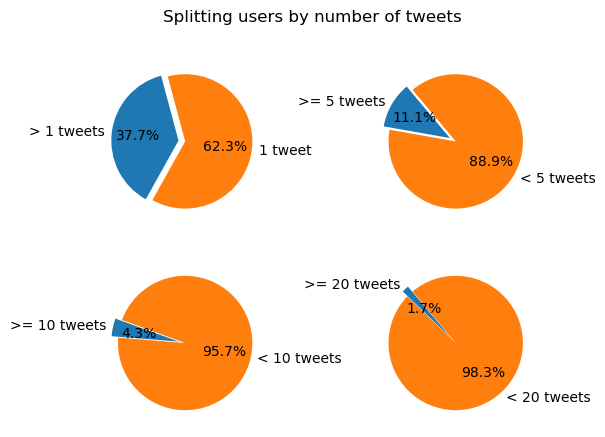

In [166]:
# Group users by creation month, after filtering for unique users with > 20 tweets
grouped_users = all_tweets.groupby('user_id')
grouped_users_counts = grouped_users.size().sort_values()
print(len(grouped_users))
grouped_users_counts_filtered_high = grouped_users_counts.where(grouped_users_counts >= 2 ).dropna()
grouped_users_counts_filtered_low = grouped_users_counts.where(grouped_users_counts < 2).dropna()
print(len(grouped_users_counts_filtered_high))
print(len(grouped_users_counts_filtered_low))

fig, axs = plt.subplots(2, 2)
fig.suptitle("Splitting users by number of tweets")
axs[0, 0].pie([len(grouped_users_counts_filtered_high),len(grouped_users_counts_filtered_low)], labels = ["> 1 tweets", "1 tweet"], autopct = '%1.1f%%', startangle = 105, explode = (0.1,0))
axs[0, 1].pie([len(grouped_users_counts.where(grouped_users_counts >= 5 ).dropna()),len(grouped_users_counts.where(grouped_users_counts < 5 ).dropna())], labels = [">= 5 tweets", "< 5 tweets"], autopct = '%1.1f%%', startangle = 130, explode = (0.1,0))
axs[1, 0].pie([len(grouped_users_counts.where(grouped_users_counts >= 10 ).dropna()),len(grouped_users_counts.where(grouped_users_counts < 10 ).dropna())], labels = [">= 10 tweets", "< 10 tweets"], autopct = '%1.1f%%', startangle = 160, explode = (0.1,0))
axs[1, 1].pie([len(grouped_users_counts.where(grouped_users_counts >= 20 ).dropna()),len(grouped_users_counts.where(grouped_users_counts < 20 ).dropna())], labels = [">= 20 tweets", "< 20 tweets"], autopct = '%1.1f%%', startangle = 130, explode = (0.1,0))
plt.show()


300319
147643


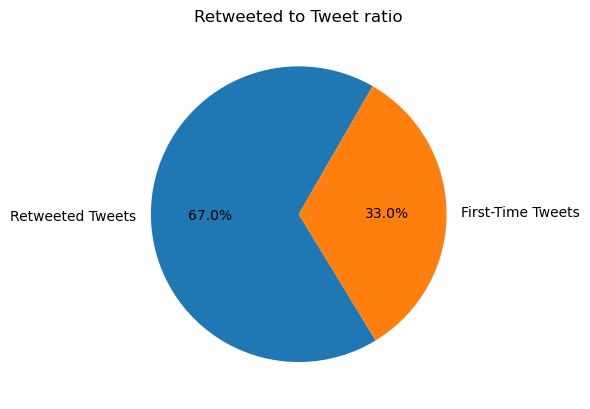

In [167]:
# Find the total number of tweets corresponding to retweets
RT_count = all_tweets['tweet_text'].str.count("^RT @").sum()
non_RT_count = all_tweets.shape[0] - RT_count
print(RT_count)
print(non_RT_count)

plt.title("Retweeted to Tweet ratio")
plt.pie([RT_count,non_RT_count], labels = ["Retweeted Tweets", "First-Time Tweets"], autopct = '%1.1f%%', startangle = 60)
plt.show()

234440
124089
65879
23554


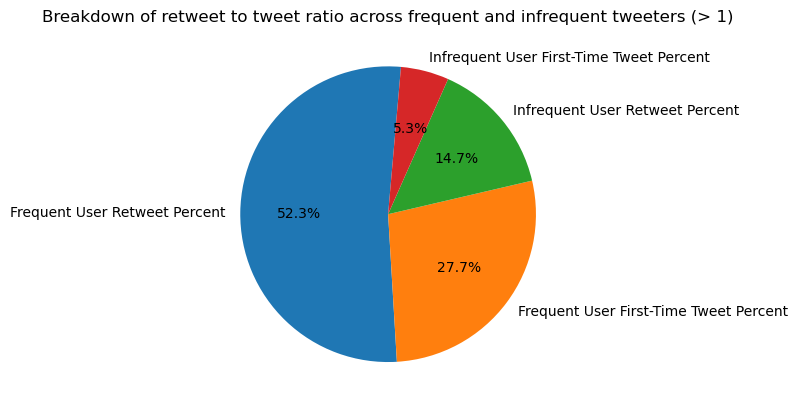

In [168]:
# Plotting frequent and infrequent users against the retweeted/unique content
grouped_users = all_tweets.groupby('user_id')
grouped_users_counts = grouped_users.size().sort_values()
grouped_users_counts_filtered_high = grouped_users_counts.where(grouped_users_counts > 1 ).dropna()
grouped_users_counts_filtered_low = grouped_users_counts.where(grouped_users_counts == 1).dropna()

# Break the users into lists and grab the slices from the dataframe
frequent_users = grouped_users_counts_filtered_high.index.tolist()
infrequent_users = grouped_users_counts_filtered_low.index.tolist()
frequent_users_tweets = all_tweets[all_tweets.user_id.isin(frequent_users)]
infrequent_users_tweets = all_tweets[all_tweets.user_id.isin(infrequent_users)]

freq_RT_count = frequent_users_tweets['tweet_text'].str.count("^RT @").sum()
freq_non_count = frequent_users_tweets.shape[0] - freq_RT_count
infreq_RT_count = infrequent_users_tweets['tweet_text'].str.count("^RT @").sum()
infreq_non_RT_count = infrequent_users_tweets.shape[0] - infreq_RT_count
print(freq_RT_count)
print(freq_non_count)
print(infreq_RT_count)
print(infreq_non_RT_count)

plt.title("Breakdown of retweet to tweet ratio across frequent and infrequent tweeters (> 1)")
plt.pie([freq_RT_count,freq_non_count,infreq_RT_count,infreq_non_RT_count], 
        labels = ["Frequent User Retweet Percent", "Frequent User First-Time Tweet Percent",
                  "Infrequent User Retweet Percent", "Infrequent User First-Time Tweet Percent"], 
        autopct = '%1.1f%%', startangle = 85)
plt.show()


(143606, 15)
user_creation_date
2006-07-31       7
2006-08-31       1
2006-09-30       1
2006-10-31       1
2006-11-30       3
              ... 
2020-07-31    3617
2020-08-31    3758
2020-09-30    3585
2020-10-31    2432
2020-11-30     197
Freq: M, Length: 173, dtype: int64
143606


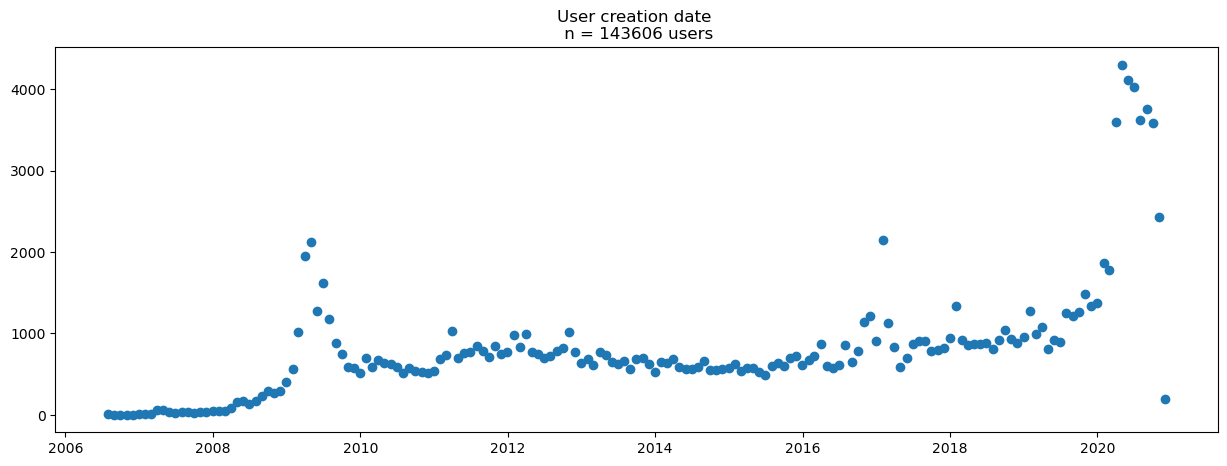

(79460, 15)


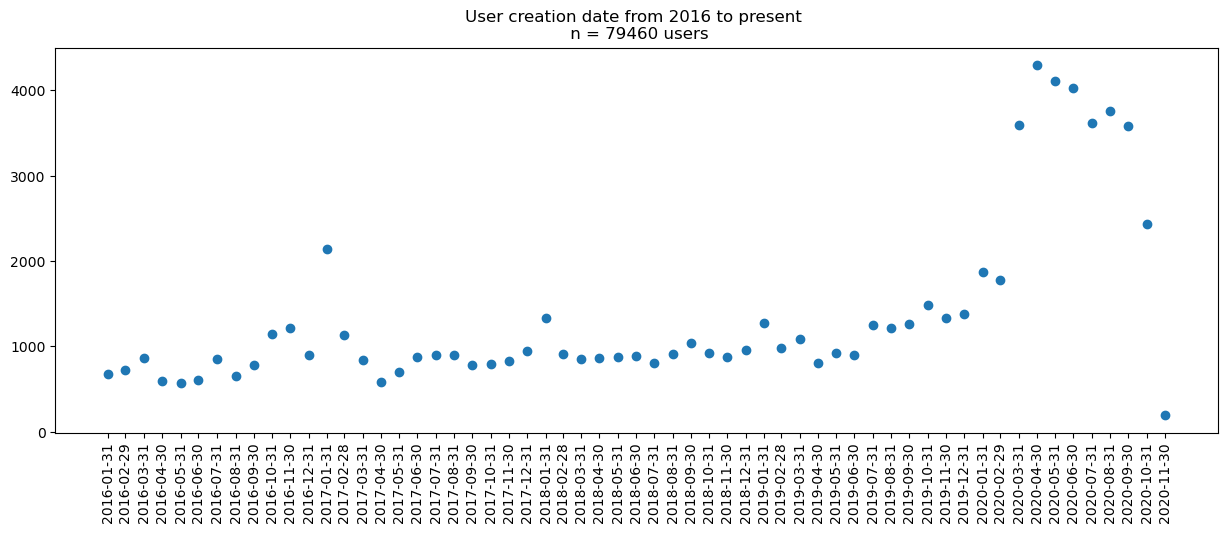

In [169]:
# User creation by month full time scale

user_creation_month_df = all_tweets.drop_duplicates(subset=['user_creation_date'])
print(user_creation_month_df.shape)
user_creation_month = user_creation_month_df.resample('M', on = 'user_creation_date').size()
print(user_creation_month)

print(user_creation_month.sum())
plt.rcParams['figure.figsize'] = [15, 5]
plt.title("User creation date \n n = %s users"%(user_creation_month_df.shape[0]))
plt.scatter(user_creation_month.index, user_creation_month)
plt.show()
plt.rcParams.update(plt.rcParamsDefault)

# User creation by month from 2016 - present

all_tweets_2016on = all_tweets[all_tweets['user_creation_date'] >= '2016-1-1']
user_creation_month_df = all_tweets_2016on.drop_duplicates(subset=['user_creation_date'])
print(user_creation_month_df.shape)
user_creation_month = user_creation_month_df.resample('M', on = 'user_creation_date').size()

plt.rcParams['figure.figsize'] = [15, 5]
plt.title("User creation date from 2016 to present \n n = %s users"%(user_creation_month_df.shape[0]))
plt.scatter(user_creation_month.index, user_creation_month)
plt.xticks(user_creation_month.index, rotation=90)
plt.show()
plt.rcParams.update(plt.rcParamsDefault)
